
# Introdução
Este notebook executa o modelo Stable Diffusion v1.4 usando a biblioteca 'diffusers' do HuggingFace. Você pode executar o notebook localmente com pelo menos 6 GB de VRAM. Este modelo é baseado na implementação [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4). 

Este modelo é obtido da plataforma hugging face. Você só precisa fornecer o Token de Autenticação uma vez, para o qual você precisa de uma conta no HuggingFace.

Os próximos blocos cobrem a instalação dos pacotes pela primeira vez e também o processo de autenticação.

In [1]:
!pip install diffusers transformers huggingface-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.5 MB/s eta 0:00:00


In [2]:
import logging
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login

torch.manual_seed(1)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

#Autenticação Necessária pela Primeira Vez
Ao executar o seguinte bloco pela primeira vez, será exibido um prompt

![](images/huggingface-notebook-login.png)

Você precisa fornecer um token de autenticação uma vez. Você pode encontrar o token acessando as configurações da sua conta do Huggingface.

Clique no Logotipo do Usuário => Settings > Access Tokens

Caso você não tenha um token de acesso, você pode gerar um e copiar/colar na caixa de entrada Token.

![](images/huggingface-user-access-token.png)

In [3]:
# The Auth Token Login process is needed only once when running on 
# local system.
if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

#Configurações do stable diffusion
Remcomendado trabalhar com resoluções menores como o padrão 512x512 e utilizar modelos de super resolução para melhorar a imagem. 

Collab pode bloquear uso de gpu se houver processamento demais.

In [4]:
CONFIGS = {
    'h': 512, # Altura padrao do Stable Diffsion v-1.4.
    'w': 512, # Largura padrão do Stable Diffsion v-1.4.
    'seed': 42 # TORCH manual seed.
}

In [6]:
# Carregando modelo FP16 que requer menos memoria comparado ao modelo FP32.
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

# Excluímos o VAE encoder, pois não precisamos dele para gerar imagens.
# Esta etapa libera mais de 2GB de VRAM, o que nos permite executar
# Stable Diffusion em uma GPU com 6GB de VRAM.
del pipe.vae.encoder

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [7]:
!ls ~/.cache/huggingface/diffusers/

ls: cannot access '/root/.cache/huggingface/diffusers/': No such file or directory


# Exemplos
Stable diffusion é chamado utilizando a funcão pipe para qual se passa:

- Prompt - conteúdo a ser gerado
- Height - Altura da imagem
- Width - Largura da imagem

Outras parametros da função pipe podem ser vistos no outro notebook disponível

  0%|          | 0/50 [00:00<?, ?it/s]

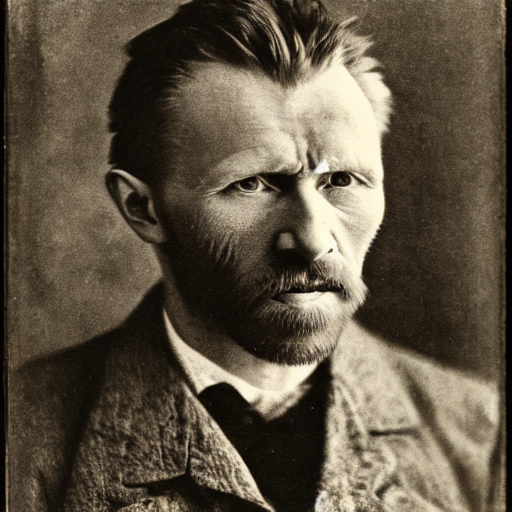

In [8]:
#torch.manual_seed(CONFIGS['seed']) # Seed pode ser usada para obter mesmos resultados. Se deixada assim as seeds serao aleatorias
prompt = "a dark, monochrome, glass negative, silver gelatine realistic, supersharp, supersharp, \
          realistic, photographic daguerrotpye portrait of vincent van gogh, shallow depth of field"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

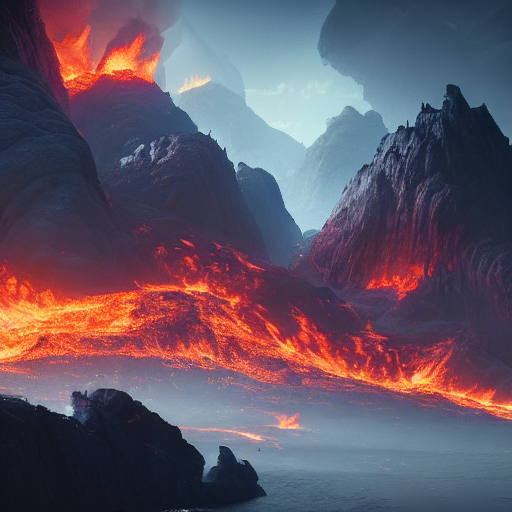

In [9]:
prompt = "A world of fire, atmospheric, hyper realistic, 8k, epic composition, \
          cinematic, octane render, artstation landscape"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

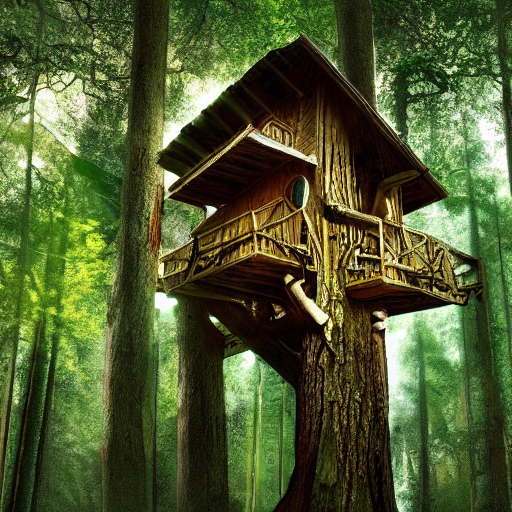

In [10]:
prompt = "tree house in the forest, atmospheric, hyper realistic, epic composition, cinematic, \
          landscape vista photography, 4k"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

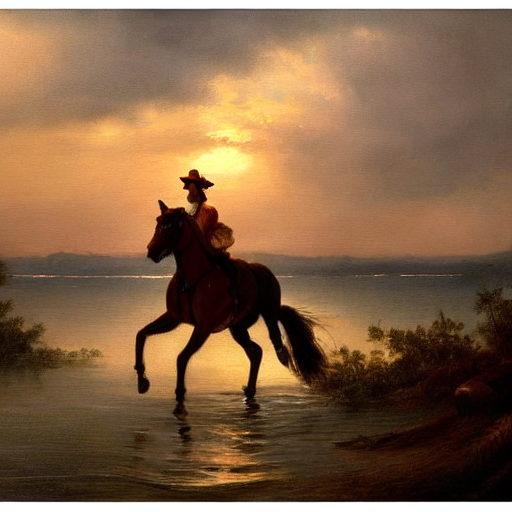

In [11]:
prompt = "a photograph of a prince riding a horse on water during sunset, oil painting \
          foggy atmosphere, cinematic"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]